In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_style("whitegrid")

In [15]:
df=pd.read_csv("/home/lucas/Downloads/HIST_PAINEL_COVIDBR_25fev2021.csv", sep=';')

In [16]:
df['data']=pd.to_datetime(df['data'])

In [17]:
municipio='Natal'
df=df[df['municipio']==municipio]

In [18]:
df['month'] = df['data'].dt.strftime('%B-%Y')

In [19]:
cols=['casosNovos', 'obitosNovos']

dict_cols={k:'mean' for k in cols}
dict_cols.update({"data":'first'})

In [20]:
tab = df.groupby('month').agg(dict_cols)

In [21]:
tab=tab.sort_values("data")

In [22]:
settings=[(0,'casosNovos','Casos Novos'),
(1,'obitosNovos','Óbitos Novos')]

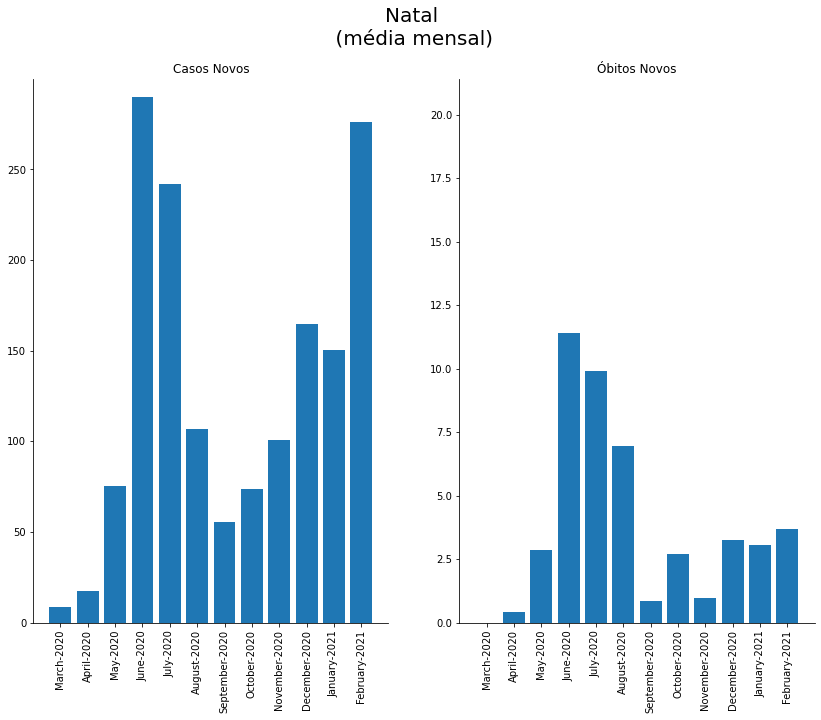

In [23]:
fig, ax=plt.subplots(1,2, figsize=(14,10))

for i, tup in enumerate(settings):
    ax[tup[0]].bar(x=tab.index,height=tab[tup[1]])
    ax[tup[0]].spines['right'].set_visible(False)
    ax[tup[0]].spines['top'].set_visible(False)
    ax[tup[0]].set_title(tup[2])
    ax[tup[0]].set_ylim(0,np.max(tab[tup[1]])+10)
    ax[tup[0]].tick_params(axis='x', rotation=90)

fig.suptitle(municipio+"\n (média mensal)", fontsize=20)

plt.show()

In [24]:
tab['death_case_ratio']=100*tab['obitosNovos']/tab['casosNovos']

In [25]:
tab

,casosNovos,obitosNovos,data,death_case_ratio
month,,,,
March-2020,8.400000,0.000000,2020-03-27,0.000000
April-2020,17.500000,0.400000,2020-04-01,2.285714
May-2020,75.516129,2.838710,2020-05-01,3.759077
June-2020,289.833333,11.400000,2020-06-01,3.933295
July-2020,241.838710,9.903226,2020-07-01,4.094971
August-2020,106.580645,6.967742,2020-08-01,6.537530
September-2020,55.333333,0.866667,2020-09-01,1.566265
October-2020,73.387097,2.709677,2020-10-01,3.692308
November-2020,100.533333,0.966667,2020-11-01,0.961538
